# Предобработка данных для банка

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler

# Загрузка данных
df = pd.read_csv('../Bank_data.csv')
df.head()
df.shape

(10000, 14)

Пропуски данных

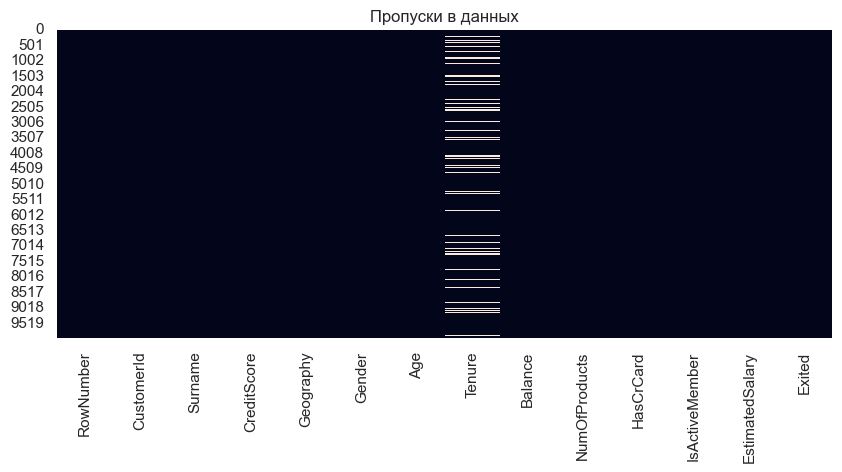

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB
None


In [117]:
# Проверяем пропуски
plt.figure(figsize=(10,4))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Пропуски в данных")
plt.show()

print(df.info())


Заполнение пропусков в Tenure 

In [118]:


df['Tenure'] = df['Tenure'].fillna(df['Tenure'].median())
print(df.isnull().sum())


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


Удаляем лишнее

In [119]:
df = df.drop(columns=["RowNumber", "CustomerId", "Surname"], errors='ignore') # на прогноз не влияет
df = df.drop_duplicates()
print("После очистки:", df.shape)


После очистки: (10000, 11)


Посмотрим на целевую переменную

C:\Users\roma\AppData\Local\Temp\ipykernel_20628\2265779271.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Exited', data=df, palette='pastel')


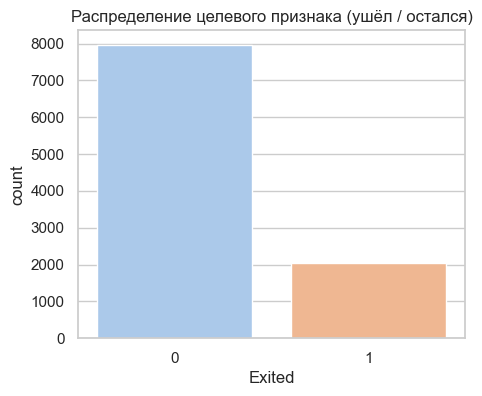

Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64


In [120]:
plt.figure(figsize=(5,4))
sns.countplot(x='Exited', data=df, palette='pastel')
plt.title("Распределение целевого признака (ушёл / остался)")
plt.show()

print(df['Exited'].value_counts(normalize=True)) # Дисаланс весьма сильный, соответственно придётся что-то делать


Числовые признаки

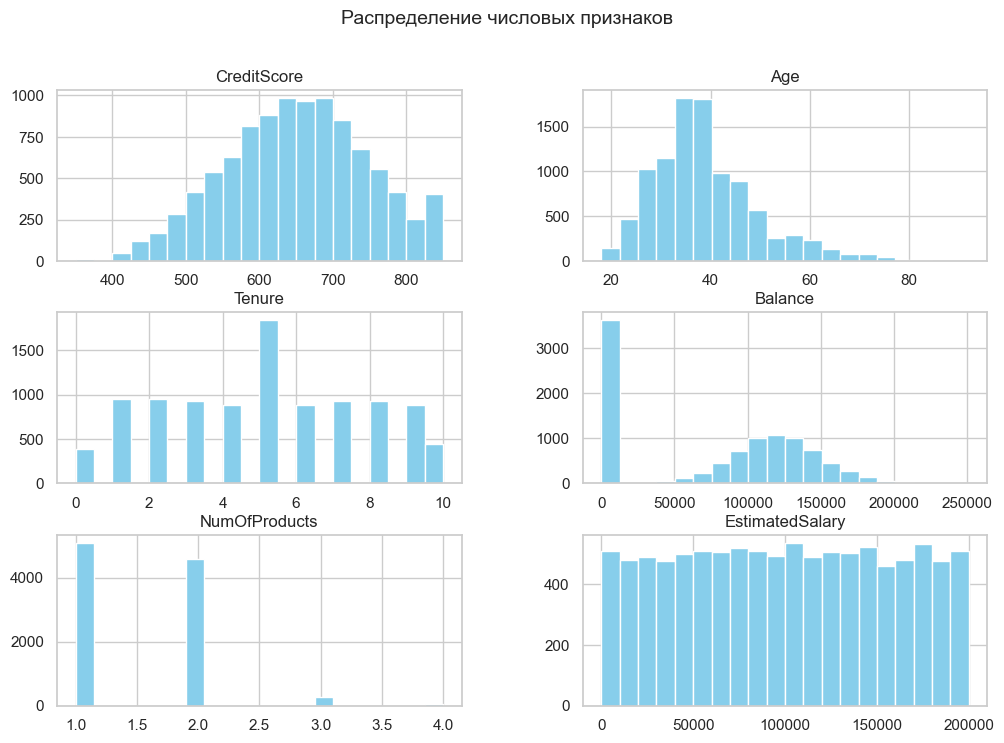

In [121]:
num_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

df[num_cols].describe()

# Строим распределения
df[num_cols].hist(bins=20, figsize=(12,8), color='skyblue')
plt.suptitle("Распределение числовых признаков", fontsize=14)
plt.show() 


Кодирование котегориальных признаков

In [123]:
# Посмотрим уникальные значения
for col in ['Geography', 'Gender']:
    print(col, ":", df[col].unique())

# Переведём текст в числа
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)
df.head()


Geography : ['France' 'Spain' 'Germany']
Gender : ['Female' 'Male']


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1.0,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8.0,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1.0,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2.0,125510.82,1,1,1,79084.10,0,False,True,False


Масштабирование

In [124]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

df[num_cols].head()


,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
0,-0.326221,0.293517,-1.086246,-1.225848,-0.911583,0.021886
1,-0.440036,0.198164,-1.448581,0.117350,-0.911583,0.216534
2,-1.536794,0.293517,1.087768,1.333053,2.527057,0.240687
3,0.501521,0.007457,-1.448581,-1.225848,0.807737,-0.108918
4,2.063884,0.388871,-1.086246,0.785728,-0.911583,-0.365276


Разделение на тестовую выборку

In [125]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='Exited')
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Размер train:", X_train.shape)
print("Размер test:", X_test.shape)


Размер train: (8000, 11)
Размер test: (2000, 11)


Баланс классов

C:\Users\roma\AppData\Local\Temp\ipykernel_20628\22695250.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, ax=ax[0], palette='pastel')
C:\Users\roma\AppData\Local\Temp\ipykernel_20628\22695250.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_test, ax=ax[1], palette='pastel')


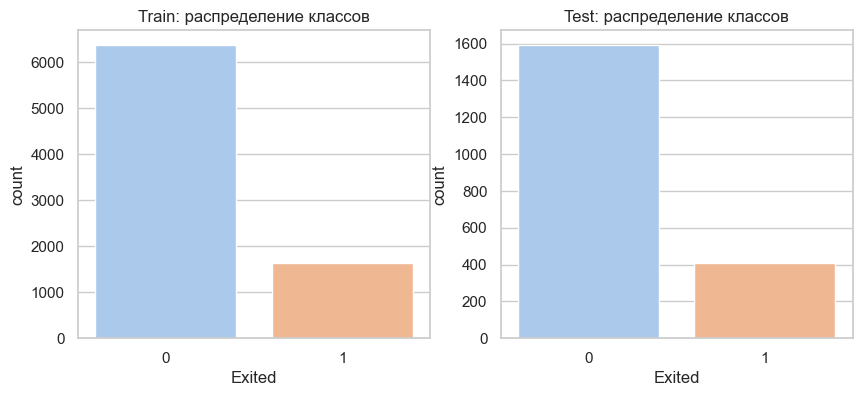

In [126]:
fig, ax = plt.subplots(1,2, figsize=(10,4))

sns.countplot(x=y_train, ax=ax[0], palette='pastel')
ax[0].set_title("Train: распределение классов")

sns.countplot(x=y_test, ax=ax[1], palette='pastel')
ax[1].set_title("Test: распределение классов")

plt.show()


## Обучение

In [128]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_auc_score, precision_recall_curve
from imblearn.over_sampling import SMOTE
import joblib

# === 2) Разделение данных
X = df.drop(columns=['Exited'])
y = df['Exited']

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42
)

# === 3) Балансировка train (SMOTE)
sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)

# === 4) Обучение лучшей модели
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train_bal, y_train_bal)

# === 5) Подбор оптимального порога по F1
valid_prob = rf.predict_proba(X_valid)[:, 1]
prec, rec, thr = precision_recall_curve(y_valid, valid_prob)
f1 = 2 * prec * rec / (prec + rec + 1e-9)
best_thr = thr[np.nanargmax(f1)]
best_f1 = np.nanmax(f1)

print(f"Best threshold on validation: {best_thr:.3f}, F1(valid)={best_f1:.3f}")

# === 6) Проверка на тесте
test_prob = rf.predict_proba(X_test)[:, 1]
y_pred = (test_prob >= best_thr).astype(int)
f1_t = f1_score(y_test, y_pred)
roc_t = roc_auc_score(y_test, test_prob)

print(f"F1(test): {f1_t:.3f}")
print(f"ROC AUC(test): {roc_t:.3f}")



Best threshold on validation: 0.528, F1(valid)=0.629
F1(test): 0.607
ROC AUC(test): 0.860
